In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_path = "C:/Users/Disha Devatha/Downloads/GymDataset.csv"
df = pd.read_csv(file_path)
print(df.head())
df.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56    Male         88.3        1.71                      1.69   
1   46  Female         74.9        1.53                      1.30   
2   32  Female         68.1        1.66                      1.11   
3   25    Male         53.2        1.70                      0.59   
4   38    Male         46.1        1.79                      0.64   

   Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313         Yoga            12.6                    3.5   
1              883         HIIT            33.9                    2.1   
2              677       Cardio            33.4                    2.3   
3              532     Strength            28.8                    2.1   
4              556     Strength            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2             

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       8
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   8
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              6
dtype: int64

In [3]:
df.isnull().sum()
df.fillna({
    'Fat_percentage': df['Fat_Percentage'].mean(),
    'Height (m)': df['Height (m)'].mean(),
    'BMI': df['BMI'].mean(),
}, inplace=True
)

if 'Fat_Percentage' in df.columns:
    df['Fat_Percentage'] = df['Fat_Percentage'].fillna(df['Fat_Percentage'].mode()[0])

df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

In [4]:
file_path = "C:/Users/Disha Devatha/Downloads/GymDataset_Encoded.csv"
data = pd.read_csv(file_path)
print(data.head())
data.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56       1         88.3        1.71                      1.69   
1   46       0         74.9        1.53                      1.30   
2   32       0         68.1        1.66                      1.11   
3   25       1         53.2        1.70                      0.59   
4   38       1         46.1        1.79                      0.64   

   Calories_Burned  Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313             3            12.6                    3.5   
1              883             1            33.9                    2.1   
2              677             0            33.4                    2.3   
3              532             2            28.8                    2.1   
4              556             2            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2       

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

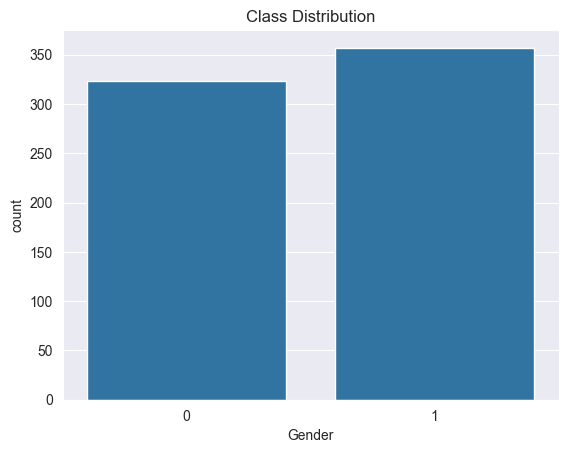

In [7]:
# Visualizing class distribution
sns.countplot(x='Gender', data=data)
plt.title('Class Distribution')
plt.show()

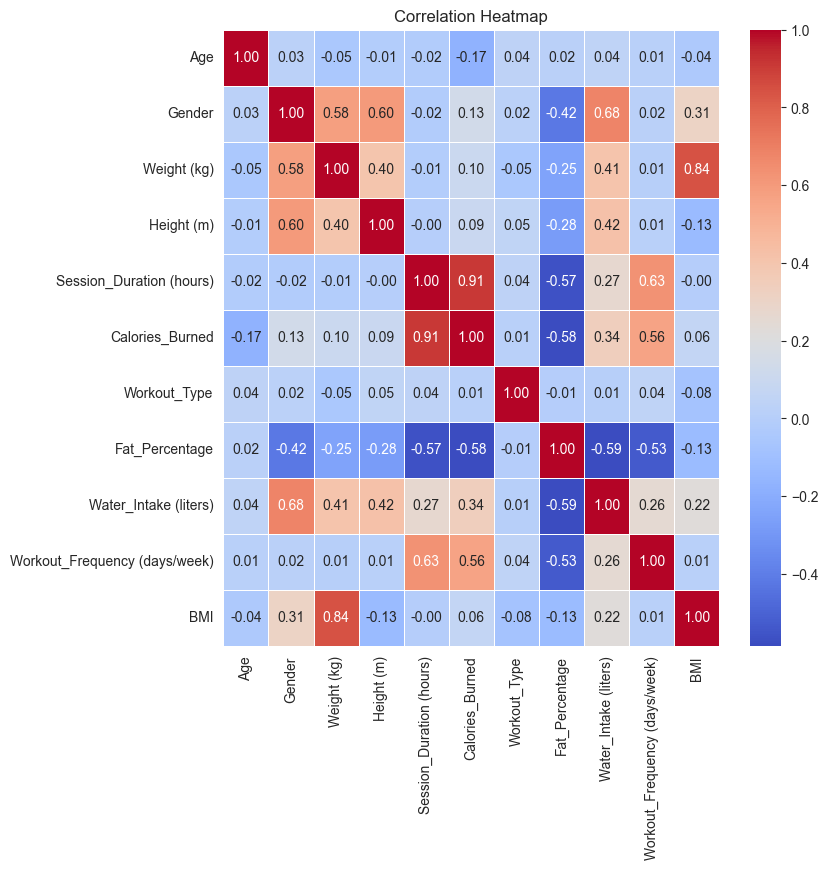

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Selecting independent (X) and dependent (Y) variables
X = df["Session_Duration (hours)"].values.reshape(-1, 1)
Y = df["Calories_Burned"].values.reshape(-1, 1)

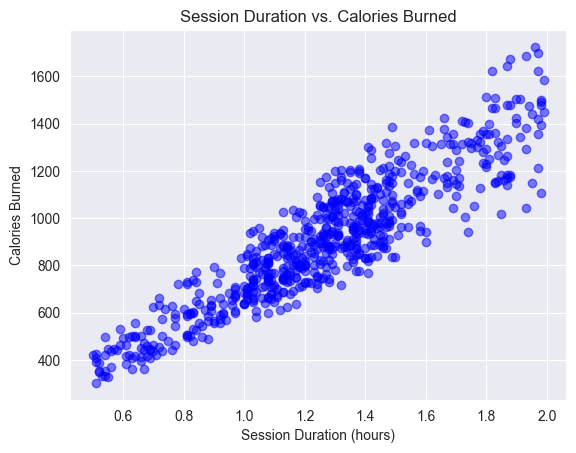

In [10]:
# Visualizing the relationship between session duration and calories burned
plt.scatter(X, Y, color='blue', alpha=0.5)
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.title("Session Duration vs. Calories Burned")
plt.show()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

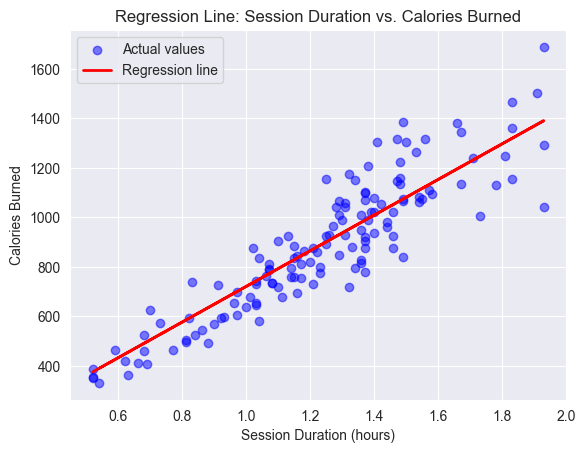

In [17]:
# Scatter plot with regression line
plt.scatter(X_test, Y_test, color='blue', alpha=0.5, label="Actual values")
plt.plot(X_test, Y_pred, color='red', linewidth=2, label="Regression line")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.title("Regression Line: Session Duration vs. Calories Burned")
plt.legend()
plt.show()

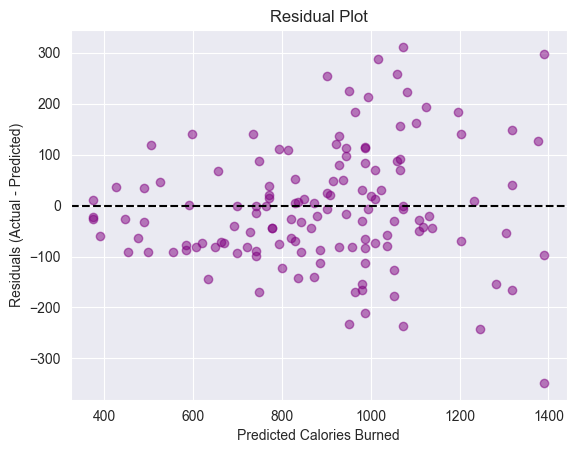

In [18]:
# Residual plot (errors visualization)
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Calories Burned")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

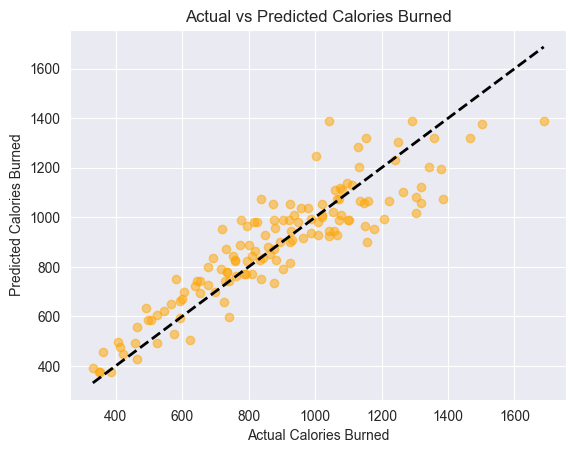

In [20]:
# Actual vs Predicted values scatter plot
plt.scatter(Y_test, Y_pred, color='orange', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories Burned")
plt.show()

In [ ]:
# Displaying the shape of training and testing sets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

In [12]:
# Displaying the shape of training and testing sets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (544, 1) (544, 1)
Testing set shape: (136, 1) (136, 1)


LinearRegression()

In [14]:
# Retrieving model parameters
intercept = model.intercept_[0]
slope = model.coef_[0][0]
print(f"Intercept (β₀): {intercept}")
print(f"Slope (β₁): {slope}")

comparison_df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
print(comparison_df.head())

Intercept (β₀): 1.5351557463515064
Slope (β₁): 719.4850491468643
   Actual    Predicted
0     350   375.667381
1     463   426.031335
2     773   886.501766
3     694   836.137813
4    1073  1073.567879


In [16]:
# Evaluating the model performance
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 90.90381653468714
Mean Squared Error (MSE): 13618.601865588445
Root Mean Squared Error (RMSE): 116.69876548442338
R-squared (R²): 0.8161359424792014
